In [1]:
#попробовать другие модели
#попробовать word2vec

import codecs # Чтобы не было проблем с кодировками.
import pandas as pd
from bs4 import BeautifulSoup as bs

import re
import numpy
import matplotlib.pyplot as plot

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import time

C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
df = pd.read_csv('traincsv/train.csv', delimiter='\t', encoding='utf8', index_col='id')

In [3]:
df2 = pd.read_csv('test.csv/test.csv', delimiter='\t', encoding='utf8', index_col='id')

In [11]:
target_array = df['target'].values

In [5]:
df = df.drop(['target'], axis=1)

In [6]:
df3 = df.append(df2)

In [7]:
df3['description'] = df3['description'].map(lambda x: bs(x, "lxml").get_text())

In [8]:
df3.head(20)

,name,description,text
id,,,
0,заведовать отдел секция в магазин york уручей,в новый магазин york хозтовары приглашать на...,заведовать отдел секция в магазин york уручей...
1,наладчик станок и манипулятор с пу,обязанность работа на токарный станок с чпу ta...,наладчик станок и манипулятор с пу наладчик ст...
2,разработчик с++ криптограф,требование опыт программирование на с++ знан...,разработчик с++ криптограф разработчик с++ ...
3,фрезеровщик,условие на работа вахтовый метод в год калу...,фрезеровщик фрезеровщик фрезеровщик фрезеровщи...
4,мерчендайзер продавец-консультант,компания палладиум стандарт - признанный лидер...,мерчендайзер продавец-консультант мерчендайзер...
5,мастер по эксплуатация здание,обязанность обеспечение бесперебойный работа...,мастер по эксплуатация здание мастер по эксплу...
6,торговый представитель,"на стабильный и распространить направление ""за...",торговый представитель торговый представитель ...
7,торговый представитель,обязанность функционал работа торговый предс...,торговый представитель торговый представитель ...
8,менеджер по продажа,обязанность продажа садовый лесопарковый те...,менеджер по продажа менеджер по продажа менедж...


In [18]:
import pymorphy2

In [19]:
m2 = pymorphy2.MorphAnalyzer()

In [20]:
df3['description'] = df3['description'].map(lambda x: re.sub('[()/|,.:;–!?]',' ', x))

In [21]:
df3['name'] = df3['name'].map(lambda x: re.sub('[()/|,.:;–!?]',' ', x))

In [36]:
df3['name'] = df3['name'].map(lambda x: ' '.join([m2.normal_forms(i)[0] for i in x.split(' ')])) 

In [38]:
df3['description'] = df3['description'].map(lambda x: ' '.join([m2.normal_forms(i)[0] for i in x.split(' ')])) 

In [4]:
#таким образом я увеличил вес name) на модели, что будет ниже это дает некоторый прирост качества
df3['text'] = ((df3['name']+' ')*15 + '| '+df3['description'])

In [5]:
df3['text'][0]

'заведовать отдел секция в магазин york  уручей  заведовать отдел секция в магазин york  уручей  заведовать отдел секция в магазин york  уручей  заведовать отдел секция в магазин york  уручей  заведовать отдел секция в магазин york  уручей  заведовать отдел секция в магазин york  уручей  заведовать отдел секция в магазин york  уручей  заведовать отдел секция в магазин york  уручей  заведовать отдел секция в магазин york  уручей  заведовать отдел секция в магазин york  уручей  заведовать отдел секция в магазин york  уручей  заведовать отдел секция в магазин york  уручей  заведовать отдел секция в магазин york  уручей  заведовать отдел секция в магазин york  уручей  заведовать отдел секция в магазин york  уручей  | в новый магазин york  хозтовары  приглашать на постоянный работа руководитель секция  хозтовары   обязанность      организация эффективный и культурный обслуживание покупатель организация приёмка-сдача товар на склад консультация покупатель по вопрос  касаться оказывать услуга

In [39]:
# сохраню, чтобы в дальнейшем использовать обработанные тексты
df3.to_csv('textForLoad.csv')

In [2]:
df3 = pd.read_csv('textForLoad.csv', delimiter=',', encoding='utf8', index_col='id')

In [6]:
df3.head()

,name,description,text
id,,,
0,заведовать отдел секция в магазин york уручей,в новый магазин york хозтовары приглашать на...,заведовать отдел секция в магазин york уручей...
1,наладчик станок и манипулятор с пу,обязанность работа на токарный станок с чпу ta...,наладчик станок и манипулятор с пу наладчик ст...
2,разработчик с++ криптограф,требование опыт программирование на с++ знан...,разработчик с++ криптограф разработчик с++ ...
3,фрезеровщик,условие на работа вахтовый метод в год калу...,фрезеровщик фрезеровщик фрезеровщик фрезеровщи...
4,мерчендайзер продавец-консультант,компания палладиум стандарт - признанный лидер...,мерчендайзер продавец-консультант мерчендайзер...


In [7]:
text_array = df3['text'].values

In [12]:
print(len(text_array))
print(len(target_array))

370179
200000


In [13]:
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('russian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iseob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
counter=TfidfVectorizer(min_df=100, ngram_range=(1,2), analyzer='word', stop_words=stop_words, sublinear_tf=True)

In [15]:
%%time
matrix_count = counter.fit_transform(text_array)

Wall time: 4min 37s


In [16]:
matrix_count[0:200000]

<200000x58790 sparse matrix of type '<class 'numpy.float64'>'
	with 32568823 stored elements in Compressed Sparse Row format>

In [17]:
len(counter.vocabulary_)

58790

In [18]:
def cross_valid(matrix_counts, target, test_size=0.3, random_state=0):
    X_train, X_test, Y_train, Y_test = train_test_split(matrix_counts, target, test_size=0.3, random_state=0)
    return (X_train, X_test, Y_train, Y_test)

In [19]:
%%time
X_train, X_test, Y_train, Y_test = cross_valid(matrix_count[0:200000], target_array)

Wall time: 2.07 s


In [20]:
%%time
model = LogisticRegression()
model.fit(X_train, Y_train)

Wall time: 13.9 s


In [21]:
%%time
predict = model.predict_proba(X_test)

Wall time: 46.2 ms


In [22]:
from sklearn import metrics
precision, recall, _ = metrics.precision_recall_curve(Y_test, predict[:,1])

(0.0, 1)

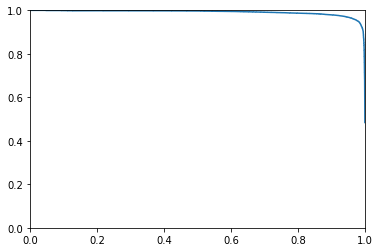

In [23]:
plot.plot(recall, precision, label='R-P')

plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1])

In [24]:
def roc_curve(title, Y_test, predicted, label='?'):
    fpr, tpr, th = metrics.roc_curve(Y_test, predicted[:,1])
    plot.plot(fpr, tpr, label=label);
    plot.xlabel('False Positive'); plot.ylabel('True Positive'); plot.title(title)
    plot.legend(bbox_to_anchor=(1, 1), loc=2); plot.xlim([0.0, 1.0]); plot.ylim([0.0, 1]);
    print ('Logistic Regression ', label, ' AUC = ', metrics.auc(fpr, tpr))

Logistic Regression  ?  AUC =  0.9929230745302806


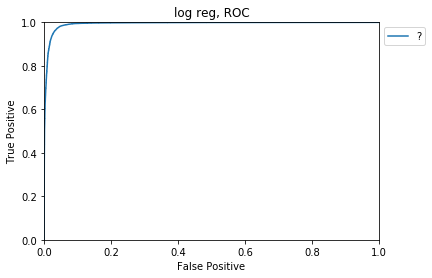

In [25]:
roc_curve('log reg, ROC', Y_test, predict)

In [26]:
predict_pr = model.predict_proba(matrix_count[200000:])

In [27]:
df_sub = pd.read_csv('sampleSubmission.csv', delimiter=',', encoding='utf8', index_col='id')

In [28]:
df_sub['target'] = predict_pr[:,1] 

In [29]:
df_sub.head(50)

,target
id,
200000,0.963199
200001,0.997907
200002,0.979693
200003,0.998017
200004,0.008344
200005,0.072169
200006,0.998484
200007,0.082735
200008,0.022789


In [28]:
pd.DataFrame(df_sub['target']).to_csv('sampleSubmissionBest.csv')